In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Task1

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


# <a id='7'>Delete the Unnamed Columns<a/>

In [4]:
df.drop('Unnamed: 0' , 1 , inplace = True)

In [5]:
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [6]:
print(f'Names Data has - rows:' ,df.shape[0], 'and columns :', df.shape[1])

Names Data has - rows: 1016395 and columns : 6


# <a id='7'>Male and female distribution<a/>

In [7]:
np.round((df['Gender'].value_counts())/len(df)*100 ,2)

F    54.98
M    45.02
Name: Gender, dtype: float64

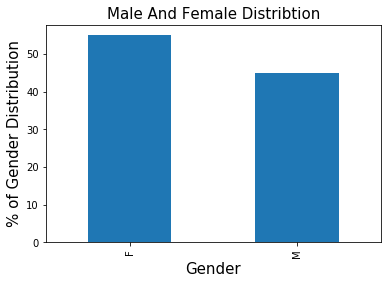

In [8]:
# Plot for the above
np.round((df['Gender'].value_counts())/len(df)*100,2).plot(kind= 'bar')
plt.xlabel('Gender' , fontsize = 15)
plt.ylabel('% of Gender Distribution' , fontsize = 15)
plt.title("Male And Female Distribtion" , fontsize = 15)
plt.show()

# <a id='7'>Show top most preferred names<a/>

In [9]:
df.groupby('Name')['Count'].sum().sort_values(ascending=False).head(5)

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
Name: Count, dtype: int64

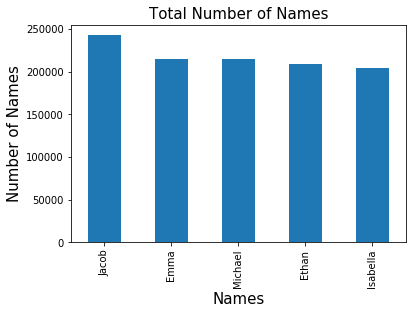

In [11]:
df.groupby('Name')['Count'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.xlabel('Names' , fontsize = 15)
plt.ylabel('Number of Names' , fontsize = 15)
plt.title("Total Number of Names" , fontsize = 15)
plt.show()

# <a id='7'>Median name occurence in the dataset<a/>

In [12]:
df['Id'].median()

2811921.0

In [16]:
df[df['Id'] == df.median()['Id']]['Name']

508197    Kasey
Name: Name, dtype: object

# <a id='7'>Distribution of Male and female born count by states<a/>

In [17]:
df.groupby(['State','Gender'])['Count'].sum()

State  Gender
AK     F          26250
       M          37399
AL     F         215308
       M         260114
AR     F         129712
                  ...  
WI     M         311758
WV     F          73800
       M          93557
WY     F          14107
       M          21912
Name: Count, Length: 102, dtype: int64

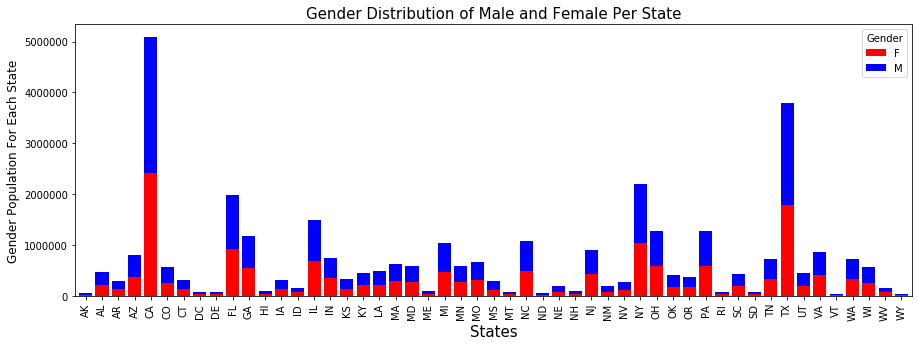

In [29]:
# Plot the above
result = df.groupby(['State','Gender'])['Count'].sum()

result.unstack().plot(kind='bar' , width = 0.8 , stacked=True , color=['Red','Blue'] , grid=False , figsize = (15,5))
plt.ylabel("Gender Population For Each State" , fontsize = 12)
plt.xlabel('States' , fontsize = 15)
plt.title("Gender Distribution of Male and Female Per State" , fontsize = 15)
plt.show()

# Task2

# We have the min and max temperatures in a city in India for each months of the year. We would like to find a function to describe this and show it graphically , the dataset given below . 


1. Fitting it to the periodic function
2. Plot the fit

In [ ]:
Data

Max = 39,41,43,47,49,51,45,38,37,29,27,25
Min = 21,23,27,28,32,35,31,28,21,19,17,18

In [31]:
df_new = pd.DataFrame({'Max' : [39,41,43,47,49,51,45,38,37,29,27,25], 'Min': [21,23,27,28,32,35,31,28,21,19,17,18]})
df_new.head()

,Max,Min
0,39,21
1,41,23
2,43,27
3,47,28
4,49,32


### [fitting it to the periodic function](#0)

### [Identify the curve for plot using scipy](#0)

In [42]:
from scipy import optimize

months = np.arange(12)

# fitting it to the periodic function
def yearly_temps(times , avg , ampl , time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi/times.max()))

# Identify the curve for plot using scipy
res_max , cov_max = optimize.curve_fit(yearly_temps , months , df_new['Max'] , [40 , 20 , 0])
res_min , cov_min = optimize.curve_fit(yearly_temps , months , df_new['Min'] , [-40 , 20 , 0])

print(res_max)
print(res_min)

[ 39.10062829 -11.0872493    2.10332481]
[24.87112259 -7.8989966   1.60673368]


# <a id='7'>Plot the Min N Max Temperature<a/>

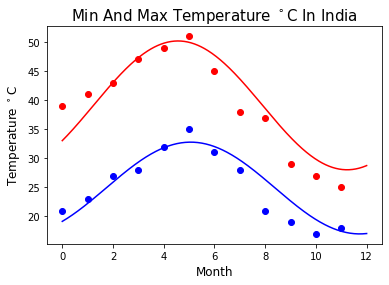

In [45]:
days = np.linspace(0,12 ,num=365)
plt.figure()
plt.plot(months , df_new['Max'] , 'ro')
plt.plot(days , yearly_temps(days , *res_max) , 'r-')
plt.plot(months , df_new['Min'] , 'bo')
plt.plot(days , yearly_temps(days , *res_min) , 'b-')
plt.xlabel("Month" , fontsize = 12)
plt.ylabel("Temperature $^\circ$C" , fontsize = 12)
plt.title('Min And Max Temperature $^\circ$C In India' , fontsize = 15)
plt.show()